# Import Libraries

In [0]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# Import Data

In [37]:
import h5py
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/A_Q3/SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (63733, 32, 32, 1) (63733, 10)
Validation set (9524, 32, 32, 1) (9524, 10)
Test set (26032, 32, 32, 1) (26032, 10)


Plot Images

In [0]:
input_shape = (32,32,1)
nClasses = 10

# Create Model

In [0]:
def createSubModel(n=2, drop=0):
  model = Sequential()

  if n==2:
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(nClasses, activation='softmax'))

  # The Second two layers with 32, 64 filters of window size 3x3
  if n==4:
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(nClasses, activation='softmax'))

  if n==6:
    model.add(Flatten(input_shape=X_train.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(nClasses, activation='softmax'))

  return model

In [0]:
subModel1 = createSubModel(2, drop=0)
subModel2 = createSubModel(2, drop=0.25)
subModel3 = createSubModel(4, drop=0)
subModel4 = createSubModel(4, drop=0.25)
subModel5 = createSubModel(6, drop=0)
subModel6 = createSubModel(6, drop=0.25)
subModel7 = createSubModel(6, drop=0.50)
subModel8 = createSubModel(6, drop=0.75)

In [41]:
batch_size = 1024
epochs = 50
subModel1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel7.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
subModel8.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print("Summary of SubModel1:")
subModel1.summary()
print("Summary of SubModel2:")
subModel2.summary()
print("Summary of SubModel3:")
subModel3.summary()
print("Summary of SubModel4:")
subModel4.summary()
print("Summary of SubModel5:")
subModel5.summary()
print("Summary of SubModel6:")
subModel6.summary()
print("Summary of SubModel7:")
subModel7.summary()
print("Summary of SubModel8:")
subModel8.summary()

Summary of SubModel1:
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_138 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_139 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Summary of SubModel2:
Model: "sequential_28"
______________________________________________

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [43]:
history1 = subModel1.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel1.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 213ms/step - loss: 2.6690 - accuracy: 0.1998 - val_loss: 2.2024 - val_accuracy: 0.2813
Epoch 2/50
63/63 [==============================] - 13s 210ms/step - loss: 2.0502 - accuracy: 0.2998 - val_loss: 1.9287 - val_accuracy: 0.3784
Epoch 3/50
63/63 [==============================] - 13s 209ms/step - loss: 1.8190 - accuracy: 0.3930 - val_loss: 1.5650 - val_accuracy: 0.5166
Epoch 4/50
63/63 [==============================] - 13s 210ms/step - loss: 1.6857 - accuracy: 0.4447 - val_loss: 1.4142 - val_accuracy: 0.5464
Epoch 5/50
63/63 [==============================] - 13s 211ms/step - loss: 1.5985 - accuracy: 0.4811 - val_loss: 1.3230 - val_accuracy: 0.5860
Epoch 6/50
63/63 [==============================] - 13s 212ms/step - loss: 1.5051 - accuracy: 0.5124 - val_loss: 1.2040 - val_accuracy: 0.6261
Epoch 7/50
63/63 [==============================] - 14s 217ms/step - loss: 1.4620 - accuracy: 0.5284 - val_loss: 1.3546 - val_accuracy: 0.5806

[0.7092078924179077, 0.7879148721694946]

In [0]:
subModel1.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel1.h5')

In [45]:
history2 = subModel2.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel2.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 211ms/step - loss: 2.5360 - accuracy: 0.1943 - val_loss: 2.1456 - val_accuracy: 0.3022
Epoch 2/50
63/63 [==============================] - 13s 209ms/step - loss: 2.0469 - accuracy: 0.2971 - val_loss: 1.8045 - val_accuracy: 0.3964
Epoch 3/50
63/63 [==============================] - 13s 212ms/step - loss: 1.8581 - accuracy: 0.3738 - val_loss: 1.4665 - val_accuracy: 0.5378
Epoch 4/50
63/63 [==============================] - 13s 211ms/step - loss: 1.7301 - accuracy: 0.4301 - val_loss: 1.6722 - val_accuracy: 0.4892
Epoch 5/50
63/63 [==============================] - 13s 210ms/step - loss: 1.6451 - accuracy: 0.4604 - val_loss: 1.5751 - val_accuracy: 0.5192
Epoch 6/50
63/63 [==============================] - 13s 212ms/step - loss: 1.5751 - accuracy: 0.4852 - val_loss: 1.2196 - val_accuracy: 0.6188
Epoch 7/50
63/63 [==============================] - 13s 210ms/step - loss: 1.5206 - accuracy: 0.5054 - val_loss: 1.2190 - val_accuracy: 0.6188

[0.7795867919921875, 0.7596803903579712]

In [0]:
subModel2.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel2.h5')

In [47]:
history3 = subModel3.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel3.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 14s 214ms/step - loss: 2.3461 - accuracy: 0.1889 - val_loss: 2.0937 - val_accuracy: 0.2601
Epoch 2/50
63/63 [==============================] - 13s 211ms/step - loss: 2.0703 - accuracy: 0.2730 - val_loss: 1.9070 - val_accuracy: 0.3678
Epoch 3/50
63/63 [==============================] - 14s 215ms/step - loss: 1.8860 - accuracy: 0.3562 - val_loss: 1.6903 - val_accuracy: 0.4445
Epoch 4/50
63/63 [==============================] - 13s 212ms/step - loss: 1.7333 - accuracy: 0.4187 - val_loss: 1.4224 - val_accuracy: 0.5363
Epoch 5/50
63/63 [==============================] - 13s 208ms/step - loss: 1.6216 - accuracy: 0.4634 - val_loss: 1.5996 - val_accuracy: 0.4944
Epoch 6/50
63/63 [==============================] - 13s 206ms/step - loss: 1.5364 - accuracy: 0.4924 - val_loss: 1.2996 - val_accuracy: 0.5910
Epoch 7/50
63/63 [==============================] - 13s 207ms/step - loss: 1.4546 - accuracy: 0.5257 - val_loss: 1.1164 - val_accuracy: 0.6511

[0.7209050059318542, 0.7824216485023499]

In [0]:
subModel3.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel3.h5')

In [49]:
history4 = subModel4.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel4.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 210ms/step - loss: 2.3166 - accuracy: 0.1798 - val_loss: 2.0692 - val_accuracy: 0.2670
Epoch 2/50
63/63 [==============================] - 13s 207ms/step - loss: 2.1251 - accuracy: 0.2429 - val_loss: 1.7545 - val_accuracy: 0.4113
Epoch 3/50
63/63 [==============================] - 13s 209ms/step - loss: 1.9724 - accuracy: 0.3132 - val_loss: 1.7330 - val_accuracy: 0.4297
Epoch 4/50
63/63 [==============================] - 13s 207ms/step - loss: 1.8409 - accuracy: 0.3729 - val_loss: 1.5441 - val_accuracy: 0.5099
Epoch 5/50
63/63 [==============================] - 13s 204ms/step - loss: 1.7274 - accuracy: 0.4205 - val_loss: 1.4145 - val_accuracy: 0.5377
Epoch 6/50
63/63 [==============================] - 13s 205ms/step - loss: 1.6575 - accuracy: 0.4474 - val_loss: 1.2858 - val_accuracy: 0.5831
Epoch 7/50
63/63 [==============================] - 13s 207ms/step - loss: 1.5680 - accuracy: 0.4833 - val_loss: 1.2734 - val_accuracy: 0.5910

[0.6850581169128418, 0.7889136672019958]

In [0]:
subModel4.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel4.h5')

In [51]:
history5 = subModel5.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel5.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2597 - accuracy: 0.1831 - val_loss: 2.4391 - val_accuracy: 0.1729
Epoch 2/50
63/63 [==============================] - 13s 205ms/step - loss: 2.1213 - accuracy: 0.2421 - val_loss: 1.8528 - val_accuracy: 0.3559
Epoch 3/50
63/63 [==============================] - 13s 207ms/step - loss: 1.9705 - accuracy: 0.3137 - val_loss: 1.7416 - val_accuracy: 0.4159
Epoch 4/50
63/63 [==============================] - 13s 207ms/step - loss: 1.8428 - accuracy: 0.3708 - val_loss: 1.4518 - val_accuracy: 0.5391
Epoch 5/50
63/63 [==============================] - 13s 206ms/step - loss: 1.7127 - accuracy: 0.4230 - val_loss: 1.4071 - val_accuracy: 0.5385
Epoch 6/50
63/63 [==============================] - 13s 205ms/step - loss: 1.6105 - accuracy: 0.4609 - val_loss: 1.2997 - val_accuracy: 0.5813
Epoch 7/50
63/63 [==============================] - 13s 203ms/step - loss: 1.5382 - accuracy: 0.4896 - val_loss: 1.1977 - val_accuracy: 0.6235

[0.7896085381507874, 0.7657498717308044]

In [0]:
subModel5.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel5.h5')

In [53]:
history6 = subModel6.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel6.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2528 - accuracy: 0.1767 - val_loss: 2.1217 - val_accuracy: 0.2376
Epoch 2/50
63/63 [==============================] - 13s 207ms/step - loss: 2.1683 - accuracy: 0.2130 - val_loss: 1.9287 - val_accuracy: 0.2924
Epoch 3/50
63/63 [==============================] - 13s 208ms/step - loss: 2.0587 - accuracy: 0.2704 - val_loss: 1.8465 - val_accuracy: 0.3573
Epoch 4/50
63/63 [==============================] - 13s 207ms/step - loss: 1.9721 - accuracy: 0.3140 - val_loss: 1.7308 - val_accuracy: 0.4015
Epoch 5/50
63/63 [==============================] - 13s 208ms/step - loss: 1.8753 - accuracy: 0.3575 - val_loss: 1.4589 - val_accuracy: 0.5191
Epoch 6/50
63/63 [==============================] - 13s 208ms/step - loss: 1.7829 - accuracy: 0.3975 - val_loss: 1.6383 - val_accuracy: 0.4502
Epoch 7/50
63/63 [==============================] - 13s 204ms/step - loss: 1.7083 - accuracy: 0.4261 - val_loss: 1.4891 - val_accuracy: 0.5126

[0.7879126071929932, 0.7562999129295349]

In [0]:
subModel6.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel6.h5')

# Comparison of Model Accuracy without and with Dropout

Text(0.5, 1.0, 'Accuracy Curves')

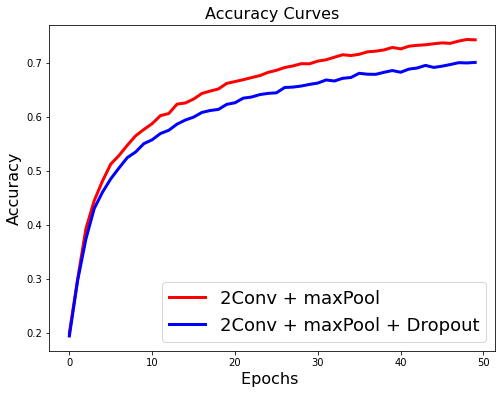

In [55]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['accuracy'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

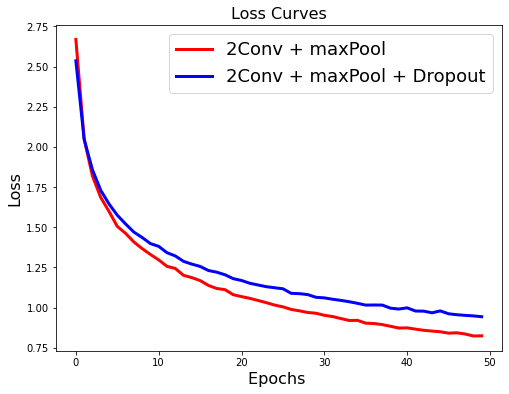

In [56]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['loss'],'b',linewidth=3.0)
plt.legend(['2Conv + maxPool', '2Conv + maxPool + Dropout'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Copmparison of Model Accuracy with increasing number of layers

Text(0.5, 1.0, 'Accuracy Curves')

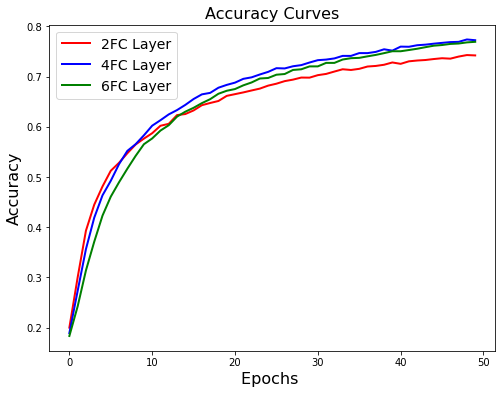

In [57]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=2.0)
plt.plot(history3.history['accuracy'],'b',linewidth=2.0)
plt.plot(history5.history['accuracy'],'g',linewidth=2.0)
plt.legend(['2FC Layer', '4FC Layer','6FC Layer'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

The Accuracy of Model increased when used higher number of Layers.

In [58]:
history7 = subModel7.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel7.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 214ms/step - loss: 2.2736 - accuracy: 0.1716 - val_loss: 2.2050 - val_accuracy: 0.1959
Epoch 2/50
63/63 [==============================] - 14s 215ms/step - loss: 2.2338 - accuracy: 0.1840 - val_loss: 2.1626 - val_accuracy: 0.1962
Epoch 3/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2110 - accuracy: 0.1867 - val_loss: 2.1055 - val_accuracy: 0.2129
Epoch 4/50
63/63 [==============================] - 15s 240ms/step - loss: 2.1876 - accuracy: 0.1929 - val_loss: 2.1166 - val_accuracy: 0.2384
Epoch 5/50
63/63 [==============================] - 13s 210ms/step - loss: 2.1400 - accuracy: 0.2134 - val_loss: 1.9422 - val_accuracy: 0.3351
Epoch 6/50
63/63 [==============================] - 13s 208ms/step - loss: 2.0764 - accuracy: 0.2478 - val_loss: 1.8374 - val_accuracy: 0.3392
Epoch 7/50
63/63 [==============================] - 13s 211ms/step - loss: 2.0212 - accuracy: 0.2851 - val_loss: 1.7617 - val_accuracy: 0.3836

[0.7849982380867004, 0.7583743333816528]

In [0]:
subModel7.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel7.h5')

In [60]:
history8 = subModel8.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
subModel8.evaluate(X_test, y_test)

Epoch 1/50
63/63 [==============================] - 13s 213ms/step - loss: 2.3420 - accuracy: 0.1516 - val_loss: 2.2567 - val_accuracy: 0.1954
Epoch 2/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2665 - accuracy: 0.1765 - val_loss: 2.2417 - val_accuracy: 0.1959
Epoch 3/50
63/63 [==============================] - 13s 210ms/step - loss: 2.2547 - accuracy: 0.1845 - val_loss: 2.2351 - val_accuracy: 0.1959
Epoch 4/50
63/63 [==============================] - 13s 212ms/step - loss: 2.2490 - accuracy: 0.1870 - val_loss: 2.2311 - val_accuracy: 0.1959
Epoch 5/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2447 - accuracy: 0.1881 - val_loss: 2.2255 - val_accuracy: 0.1959
Epoch 6/50
63/63 [==============================] - 13s 209ms/step - loss: 2.2425 - accuracy: 0.1884 - val_loss: 2.2287 - val_accuracy: 0.1959
Epoch 7/50
63/63 [==============================] - 13s 208ms/step - loss: 2.2417 - accuracy: 0.1882 - val_loss: 2.2244 - val_accuracy: 0.1959

[2.2239551544189453, 0.19587430357933044]

In [0]:
subModel8.save('/content/drive/My Drive/Colab Notebooks/A_Q3/FullyConnected/FCModels/subModel8.h5')

# Effect of increasing rate of dropout on Accuracy

Text(0.5, 1.0, 'Accuracy Curves')

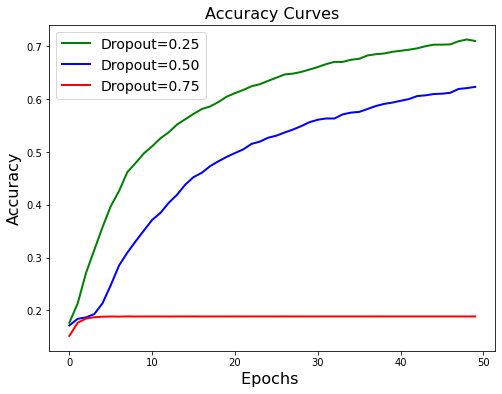

In [62]:
plt.figure(figsize=[8,6])
plt.plot(history6.history['accuracy'],'g',linewidth=2.0)
plt.plot(history7.history['accuracy'],'b',linewidth=2.0)
plt.plot(history8.history['accuracy'],'r',linewidth=2.0)
plt.legend(['Dropout=0.25', 'Dropout=0.50','Dropout=0.75'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Main Model

-*# Dense layers* ---> 4                
-*Acrivation*         ---> 'relu'   
-*total Parameters*   ---> 987,146

In [0]:
model3 = createSubModel(4, drop=0)

In [64]:
batch_size = 1024
epochs = 100
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_182 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_183 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_75 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_185 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_76 (Dropout)         (None, 256)             

In [0]:
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Train

*Maximum Accuracy* ----> 82.24%    
*Maximum Validation Acc* ---> 82.31%    
*Test Accuracy* ----> 82.31% 

In [66]:
history = model3.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1)
model3.evaluate(X_test, y_test)

Epoch 1/100
63/63 [==============================] - 14s 221ms/step - loss: 2.2893 - accuracy: 0.1870 - val_loss: 2.0802 - val_accuracy: 0.2694
Epoch 2/100
63/63 [==============================] - 14s 220ms/step - loss: 2.0471 - accuracy: 0.2828 - val_loss: 2.0504 - val_accuracy: 0.3132
Epoch 3/100
63/63 [==============================] - 14s 220ms/step - loss: 1.8498 - accuracy: 0.3686 - val_loss: 1.7190 - val_accuracy: 0.4431
Epoch 4/100
63/63 [==============================] - 14s 220ms/step - loss: 1.7230 - accuracy: 0.4231 - val_loss: 1.4905 - val_accuracy: 0.5227
Epoch 5/100
63/63 [==============================] - 14s 219ms/step - loss: 1.6094 - accuracy: 0.4656 - val_loss: 1.2783 - val_accuracy: 0.5940
Epoch 6/100
63/63 [==============================] - 14s 215ms/step - loss: 1.5217 - accuracy: 0.4983 - val_loss: 1.2981 - val_accuracy: 0.5832
Epoch 7/100
63/63 [==============================] - 14s 217ms/step - loss: 1.4482 - accuracy: 0.5257 - val_loss: 1.3022 - val_accuracy:

[0.5892549157142639, 0.8231407403945923]

In [67]:
y_test_pred = model3.predict(X_test).argmax(axis=1)
y_test_pred

array([5, 2, 1, ..., 7, 6, 7])

**Curves**

Text(0.5, 1.0, 'Accuracy Curves')

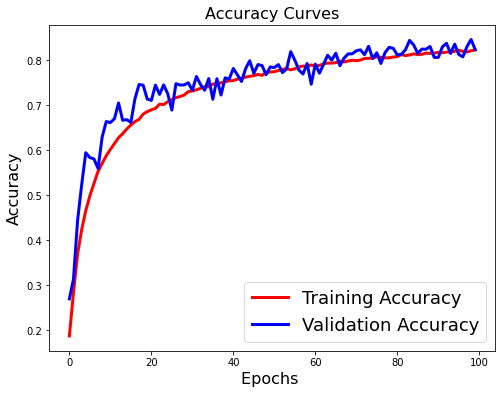

In [69]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Loss Curves')

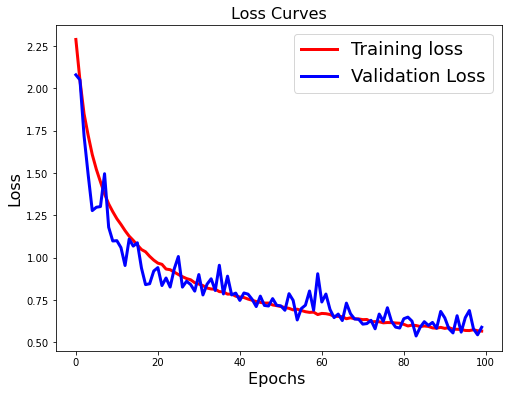

In [68]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# **Save model**

In [0]:
model3.save('/content/drive/My Drive/Colab Notebooks/A_Q3/model3.h5')